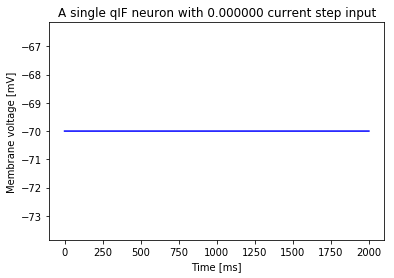

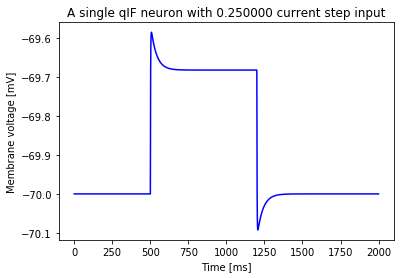

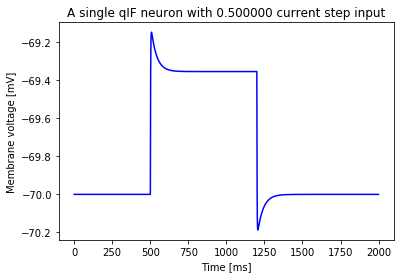

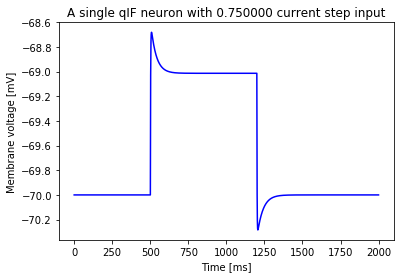

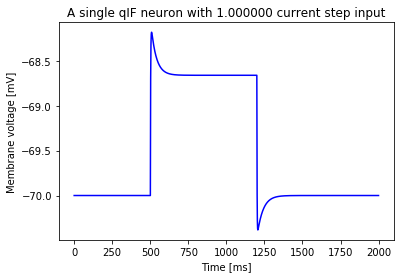

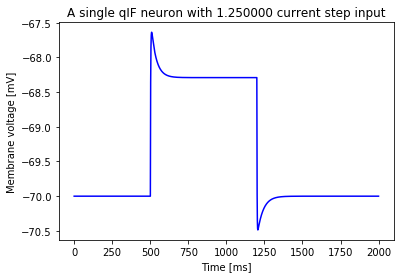

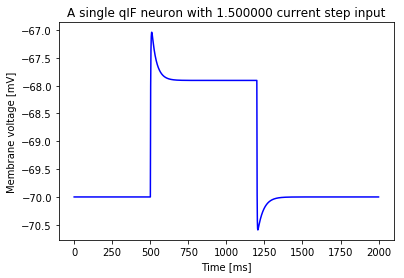

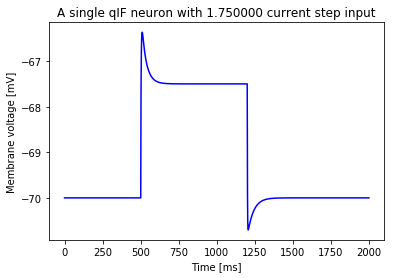

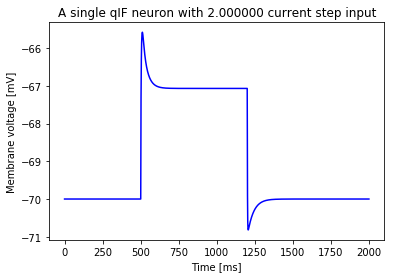

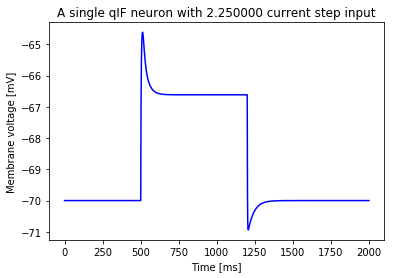

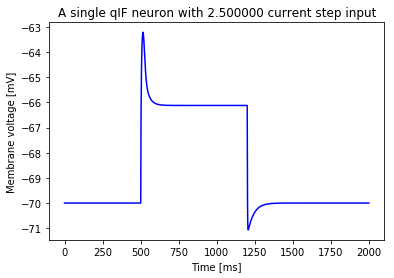

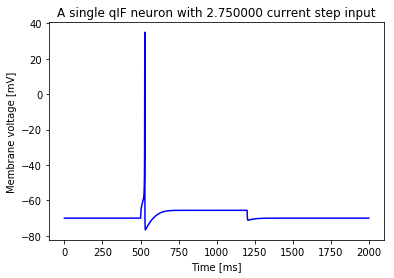

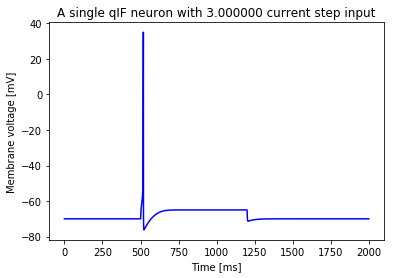

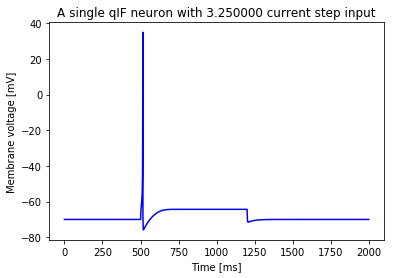

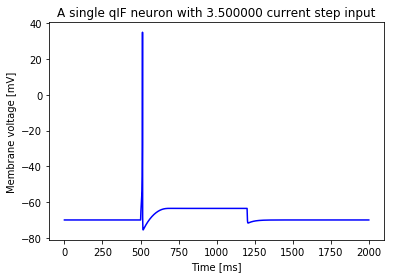

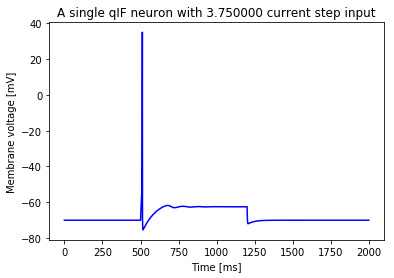

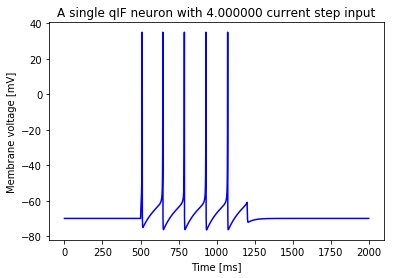

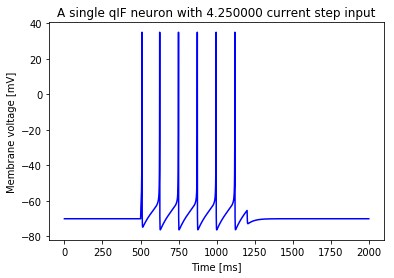

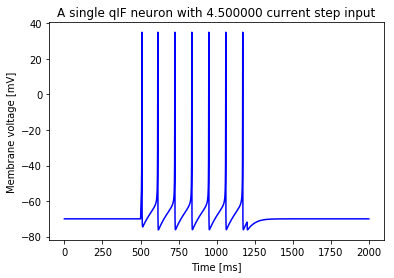

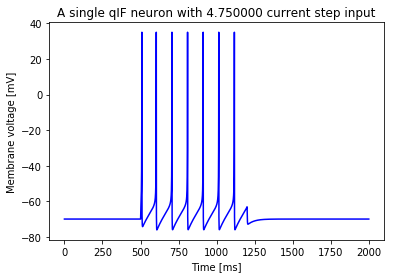

"\nfrom pylab import *\n\ntmax = 1000.0\ndt = 0.5\n\n# 1.1) Neuron / Network pars\na = 0.02\nb = 0.2\nc = -65.0\nd = 8.0\ntau_s = 10.0 # decay of synapses [ms]\n\n# 1.2) Input pars\ntr=array ([200.0 ,700.0])/ dt\nrate_in = 2 # input rate\nn_in = 100 # number of inputs\nw_in = 0.07 # input weights\nW_in = w_in * ones(n_in) # vector\n\n# 2) reserve memory\nT = ceil(tmax / dt)\nv = zeros(int(T))\nu = zeros(int(T))\nv[0] = -70 # resting potential\nu[0] = -14 # steady state\ns_in = zeros(n_in) # synaptic variable\nE_in = zeros(n_in) # rev potential\nprate = dt * rate_in * 1e-3 # abbrev\n\n# 3) for−loop over time\nfor t in arange(int(T) - 1):\n    # 3.1) get input\n    if t > tr[0] and t < tr[1]:\n        # NEW: get input Poisson spikes\n        p = uniform(size = n_in) < prate;\n    else:\n        p = 0; # no input\n\n    # NEW: calculate input current\n    s_in = (1 - dt / tau_s ) * s_in + p\n    I = dot(W_in, s_in * E_in)\n    I -= dot(W_in, s_in ) * v[t]\n\n    if v[t] < 35:\n        # 3

In [3]:
%matplotlib inline
""" Step 1:
"""

from pylab import *

range_start = 0
range_end = 500
range_step = 25
range_divisor = 100

for current in range(range_start, range_end, range_step):   # Use integer range and divide by 100
    tmax = 2000.0
    dt = 0.5

    # 1.1) Neuron / Network pars
    a = 0.02    # RS, IB : 0.02 , FS: 0.1
    b = 0.2     # RS, IB ,FS: 0.2
    c = -65.0   # RS,FS: −65 IB : −55
    d = 8.0     # RS: 8 , IB : 4 , FS: 2

    # 1.2) Input pars
    Iapp = float(current) / range_divisor
    tr = array ([500.0, 1200.0]) / dt  # stm time

    # 2) reserve memory
    T = int(ceil(tmax / dt))
    v = zeros(T)
    u = zeros(T)
    v[0] = -70  # resting potential
    u[0] = -14  # steady state

    # 3) for−loop over time
    for t in arange(T - 1):
        # 3.1) get input
        if t > tr[0] and t < tr[1]:
            I = Iapp
        else:
            I = 0

        if v[t] < 35:
            # 3.2) update ODE
            dv = (0.04 * v[t] + 5) * v[t] + 140 - u[t]
            v[t + 1] = v[t] + (dv + I) * dt
            du = a * (b * v[t] - u[t])
            u[t + 1] = u[t] + dt * du
        else :
            # 3.3) spike !
            v[t] = 35
            v[t + 1] = c
            u[t + 1] = u[t] + d

    # 4) plot voltage trace
    figure()
    tvec = arange(0.0, tmax, dt)
    plot(tvec, v, 'b', label='Voltage trace')
    xlabel('Time [ms]')
    ylabel('Membrane voltage [mV]')
    title('A single qIF neuron with %f current step input' % Iapp)
    show()

""" Step 2:
"""
"""
from pylab import *

tmax = 1000.0
dt = 0.5

# 1.1) Neuron / Network pars
a = 0.02
b = 0.2
c = -65.0
d = 8.0
tau_s = 10.0 # decay of synapses [ms]

# 1.2) Input pars
tr=array ([200.0 ,700.0])/ dt
rate_in = 2 # input rate
n_in = 100 # number of inputs
w_in = 0.07 # input weights
W_in = w_in * ones(n_in) # vector

# 2) reserve memory
T = ceil(tmax / dt)
v = zeros(int(T))
u = zeros(int(T))
v[0] = -70 # resting potential
u[0] = -14 # steady state
s_in = zeros(n_in) # synaptic variable
E_in = zeros(n_in) # rev potential
prate = dt * rate_in * 1e-3 # abbrev

# 3) for−loop over time
for t in arange(int(T) - 1):
    # 3.1) get input
    if t > tr[0] and t < tr[1]:
        # NEW: get input Poisson spikes
        p = uniform(size = n_in) < prate;
    else:
        p = 0; # no input

    # NEW: calculate input current
    s_in = (1 - dt / tau_s ) * s_in + p
    I = dot(W_in, s_in * E_in)
    I -= dot(W_in, s_in ) * v[t]

    if v[t] < 35:
        # 3.2) update ODE
        dv = (0.04 * v[t] + 5) * v[t] + 140 - u[t]
        v[t + 1] = v[t] + (dv + I ) * dt
        du = a * (b * v[t] - u[t])
        u[t + 1] = u[t] + dt * du
    else:
        # 3.3) spike !
        v[t] = 35
        v[t + 1] = c
        u[t + 1] = u[t] + d

# 4) plot voltage trace
figure()
tvec = arange(0.0, tmax, dt)
plot(tvec, v, 'b', label='Voltage trace')
xlabel('Time [ms]')
ylabel('Membrane voltage [mV]')
title('A single qIF neuron with %d Poisson inputs' % n_in)
show()
"""

#if __name__ == '__main__':
#    import doctest
#    doctest.testmod()

This is just some text.
Perhaps we should try to make something useful here.

In [ ]:
def primes():
    #What was that nice generator version of primes?